## Project 2

- ### Release Date: Saturday, April 25
- ### Due Date: Tuesday May 12, 11:59 PM

### Introduction

In Project 2, we will develop a model that can classify spam emails from non-spam emails. Remember that spam means junk, commercial or bulk emails. We will get practice with

- Encoding text to determine features from documents
- Using packages to process data and fit models
- Validating the performance of models to reduce overfitting
- Generating ROC curves

You will have the chance to try out your own model in a [Kaggle competition](https://www.kaggle.com/c/dsua-112-project2).  

We will guide you through the problems step by step. However, we encourage you to discuss with us in Office Hours and on Piazza so that we can work together through these steps. 

#### Submission Instructions

Submission of homework requires two steps. See **Homework 0** for more information.

##### _Step 1_
You are required to **submit your notebook on JupyterHub**. Please navigate to the `Assignments` tab to  
- fetch
- modify 
- validate
- submit 

your notebook. Consult the [instructional video](https://nbgrader.readthedocs.io/en/stable/user_guide/highlights.html#student-assignment-list-extension-for-jupyter-notebooks) for more information about JupyterHub.

##### _Step 2_
You are required to **submit a copy of your notebook to Gradescope**. Follow these steps

##### _Formatting Instructions_


1. Download as HTML (`File->Download As->HTML(.html)`). 
1. Open the HTML in the browser. Print to .pdf 
1. Upload to Gradescope. Consult the [instructional video](https://www.gradescope.com/get_started#student-submission) for more information about Gradescope. 
1. Indicate the location of your responses on Gradescope. You must tag your answer's page numbers to the appropriate question on Gradescope. See instructional video for more information.

Note that 

- You should break long lines of code into multiple lines. Otherwise your code will extend out of view from the cell. Consider using `\` followed by a new line. 
- For each textual response, please include relevant code that informed your response. 
- For each plotting question, please include the code used to generate the plot. If your plot does not appear in the HTML / pdf output, then use `Image('name_of_file', embed = True)` to embed it.
- You should not display large output cells such as all rows of a table. 

**Important**: Gradescope points will be awarded if and only if all the formatting instructions are followed. 

#### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Name:** *list name here*

**NetId:** *list netid here*

**Collaborators:** *list names here*

### Rubric
Question | Points
--- | ---
Gradescope | 2
1a | 1
1b | 1
1c | 1
1d | 0
2 | 3
3a | 2
3b | 2
4 | 1
5 | 2
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
7 | 2
8a | 2
8b | 3
Total | 29

In [63]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

# Set some parameters in the packages 

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.dpi'] = 150

pd.options.display.max_rows = 20  
pd.options.display.max_columns = 15

np.random.seed(42)

# Some packages to help with configuration

import os, sys
from IPython.display import Image, display

In [64]:
home_path = os.environ["HOME"]
training_set_path = f'{home_path}/shared/Project2/train.csv' 
testing_set_path = f'{home_path}/shared/Project2/test.csv'

In [65]:
# TEST 

assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'matplotlib' in sys.modules and "plt" in locals()
assert 'sklearn' in sys.modules and "LogisticRegression" in locals()
assert "home_path" in locals()

### 1. Loading in the Data

In email classification, our goal is to classify emails as spam or not spam (referred to as "ham") using features generated from the text in the email. 

The dataset consists of email messages and their labels (0 for ham, 1 for spam). Your labeled training dataset contains 8348 labeled examples, and the test set contains 1000 unlabeled examples.

Run the following cells to load in the data into DataFrames.

The `train` DataFrame contains labeled data that you will use to train your model. It contains four columns:

1. `id`: An identifier for the training example
1. `subject`: The subject of the email
1. `email`: The text of the email
1. `spam`: 1 if the email is spam, 0 if the email is ham (not spam)

The `test` DataFrame contains 1000 unlabeled emails. You will predict labels for these emails.

In [66]:
original_training_data = pd.read_csv(training_set_path)

We should convert the text to lowercase letters.

In [67]:
original_training_data['email'] = original_training_data['email'].str.lower()
original_training_data

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0
...,...,...,...,...
8343,8343,Subject: Re: ALSA (almost) made easy\n,"thanks for this, i'm going to give them anothe...",0
8344,8344,Subject: Re: Goodbye Global Warming\n,thanks for the link - i'm fascinated by archae...,0
8345,8345,Subject: hello\n,we need help. we are a 14 year old fortune 50...,1
8346,8346,Subject: Your application is below. Expires Ju...,<html>\n \n \n <head> \n <meta charset=3dutf-8...,1


### Question 1a
First, let's check if our data contains any missing values. Fill in the cell below to print the number of NaN values in each column. If there are NaN values, replace them with appropriate filler values (i.e., NaN values in the `subject` or `email` columns should be replaced with empty strings). Print the number of NaN values in each column after this modification to verify that there are no NaN values left.

Note that while there are no NaN values in the `spam` column, we should be careful when replacing NaN labels. Doing so without consideration may introduce significant bias into our model when fitting.

In [68]:
print('Before Filling:')
print(original_training_data.isnull().sum())

# fill missing values with empty string

# YOUR CODE HERE
#raise NotImplementedError()
original_training_data=original_training_data.fillna("")

print('------------')
print('After Filling:')
print(original_training_data.isnull().sum())

Before Filling:
id         0
subject    6
email      0
spam       0
dtype: int64
------------
After Filling:
id         0
subject    0
email      0
spam       0
dtype: int64


In [69]:
# TEST

assert original_training_data.isnull().sum().sum() == 0

### Question 1b

In the cell below, print the text of the zeroth ham and the fourth spam email in the original training set.

In [70]:
spam = original_training_data[["email","spam"]][original_training_data["spam"] == 1]
ham = original_training_data[["email","spam"]][original_training_data["spam"] == 0]
zero_ham = ham["email"].iloc[0]
fourth_spam = spam["email"].iloc[3]


# YOUR CODE HERE
#raise NotImplementedError()

print("Ham \n", zero_ham)
print("Spam \n", fourth_spam)

Ham 
 url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

Spam 
 dear ricardo1 ,
 
 <html>
 <body>
 <center>
 <b><font color = "red" size = "+2.5">cost effective direct email advertising</font><br>
 <font color = "blue" size = "+2">promote your business for as low as </font><br>
 <font color = "red" size = "+2">$50</font> <font color = "blue" size = "+2">per 
 <font color = "red" size = "+2">1 million</font>
 <font color = "blue" size = "+2"> email addresses</font></font><p>
 <b><font color = "#44c300" size ="+2">maximize your marketing dollars!<p></font></b>
 <font size = "+2">complete and fax this information form to 309-407-7378.<br>
 a consultant will contact you to discuss your 

In [71]:
# TEST
assert len(zero_ham) > 0 and zero_ham[:0] == ''
assert len(fourth_spam) > 0 and fourth_spam[:0] == ''


### Question 1c

Below we have four features of the emails. Among the choices, select those features indicative of spam.

1. HTML tags within brackets < and >
1. Dollar sign $ about money
1. URL indicating website .com 
1. Salutation with the word dear

Each choice should appear in the spam email but not the ham email.

In [72]:
q1c = [1,2]

# YOUR CODE HERE
#raise NotImplementedError()

In [73]:
# TEST 

assert set(q1c).issubset({1,2,3,4})


### Question 1d

The training data is available for both training models and **validating** the models that we train.  We therefore need to split the training data into separate training and validation datsets.  You will need this **validation data** to assess the performance of your classifier once you are finished training. Note that we set the seed (random_state) to 42. This will produce a "random" sequence of numbers that is the same for every student. Do not modify this in the following questions, as our tests depend on this random seed.

In [74]:
training_set, validation_set = train_test_split(original_training_data, test_size=0.1, random_state=42)

In [75]:
# TEST 

assert len(training_set) == 7513
assert len(validation_set) == 835

## 2. Feature Selection

We would like to take the text of an email and predict whether the email is ham or spam. This is a *classification* problem, so we can use logistic regression to train a classifier. Recall that to train an logistic regression model we need a numeric feature matrix $X$ and a vector of corresponding binary labels $y$.  

However the data is text, not numbers. To address this, we can create numeric features derived from the email text and use those features for logistic regression.

Each row of $X$ is an email. Each column of $X$ contains one feature for all the emails. We'll guide you through creating a simple feature, and you'll create more interesting ones when you are trying to increase your accuracy.

### Question 2

Create a function called `words_in_texts` that takes in a list of `words` and a pandas Series of email `texts`. It should output a 2-dimensional NumPy array containing one row for each email text. The row should contain either a 0 or a 1 for each word in the list: 0 if the word doesn't appear in the text and 1 if the word does. For example:

```
>>> words_in_texts(['hello', 'bye', 'world'], 
                   pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])
```

In [76]:
def words_in_texts(words, texts):
    '''
    Inputs:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Output:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    ans = []
    for text in texts:
        temp = []
        for word in words:
            if word in text:
                temp.append(1)
            else:
                temp.append(0)
        ans.append(temp)
    return np.array(ans)
# YOUR CODE HERE
#raise NotImplementedError()

In [77]:
words_in_texts(['hello', 'bye', 'world'],pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])

In [78]:
# TEST
assert np.allclose(words_in_texts(['hello', 'bye', 'world'], 
                           pd.Series(['hello', 'hello worldhello'])),
            np.array([[1, 0, 0], 
                      [1, 0, 1]])) == True


## 3. Visualization
We need to identify some features that allow us to distinguish spam emails from ham emails. One idea is to compare the distribution of a single feature in spam emails to the distribution of the same feature in ham emails. If the feature is whether a certain word occurs in the text, this amounts to comparing the proportion of spam emails with the word to the proportion of ham emails with the word.

The following plot (which was created using `sns.barplot`) compares the proportion of emails in each class containing a particular set of words. 

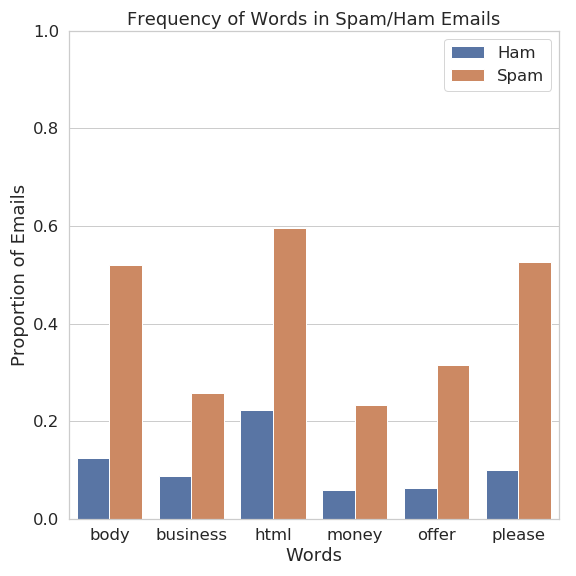

In [79]:
Image(f"{home_path}/shared/Project2/training_conditional_proportions.png")

To generate the bar-chart we will use the `melt` function in `pandas`. For example, suppose we had the following data. 

In [80]:
df = pd.DataFrame({
    'word_1': [1, 0, 1, 0],
    'word_2': [0, 1, 0, 1],
    'type': ['spam', 'ham', 'ham', 'ham']
})
display(df)

,word_1,word_2,type
0,1,0,spam
1,0,1,ham
2,1,0,ham
3,0,1,ham


With melt we switch from a "wide" format to a "long" format in the table.

In [81]:
df.melt("type")

,type,variable,value
0,spam,word_1,1
1,ham,word_1,0
2,ham,word_1,1
3,ham,word_1,0
4,spam,word_2,0
5,ham,word_2,1
6,ham,word_2,0
7,ham,word_2,1


Note that `melt` will turn columns into variable. Here `word_1` and `word_2` become `variable`. Their values are stored in the value column.

### Question 3a

We want to create a bar chart like the one above comparing the proportion of spam and ham emails containing certain words. We will take the words to be 

- `opportunity`
- `bank`
- `receive`
- `dear`
- `best`
- `deal`

We need three steps. For Step 1, we encode the words as 0 and 1 with the function from Question 2.

In [82]:
# Step 1 encode the words as 1 and 0

training_set = training_set.reset_index(drop=True) 

vocabulary = ['body', 'html', 'please', 'money', 'business', 'offer']
encoded_words = words_in_texts(vocabulary, training_set['email'])

encoded_table = pd.DataFrame(data = encoded_words, columns = vocabulary)
encoded_table['label'] = training_set['spam'].replace({0:"ham", 1: "spam"})

encoded_table

,body,html,please,money,business,offer,label
0,0,0,0,0,0,0,ham
1,1,1,0,0,0,0,ham
2,0,0,1,0,0,0,ham
3,0,1,1,0,0,0,ham
4,1,1,0,0,1,1,ham
...,...,...,...,...,...,...,...
7508,0,0,0,0,0,0,ham
7509,0,0,1,1,1,1,spam
7510,1,0,0,0,0,1,ham
7511,0,0,0,0,0,0,ham


Moreover we changed 0 and 1 to "ham" and "spam". For Step 2, we use melt to generate the data for the bar-chart

In [83]:
encoded_table_melted = encoded_table.melt('label')
display(encoded_table_melted)

encoded_table_melted_groups = encoded_table_melted.groupby(['label', 'variable']).mean()
encoded_table_melted_groups = encoded_table_melted_groups.reset_index()
encoded_table_melted_groups

,label,variable,value
0,ham,body,0
1,ham,body,1
2,ham,body,0
3,ham,body,0
4,ham,body,1
...,...,...,...
45073,ham,offer,0
45074,spam,offer,1
45075,ham,offer,1
45076,ham,offer,0


,label,variable,value
0,ham,body,0.123682
1,ham,business,0.087042
2,ham,html,0.222163
3,ham,money,0.058266
4,ham,offer,0.062198
5,ham,please,0.099553
6,spam,body,0.519812
7,spam,business,0.257039
8,spam,html,0.595412
9,spam,money,0.232534


For Step 3, use the table `encoded_table_melted_groups` to generate a bar-chart with `sns.barplot`.

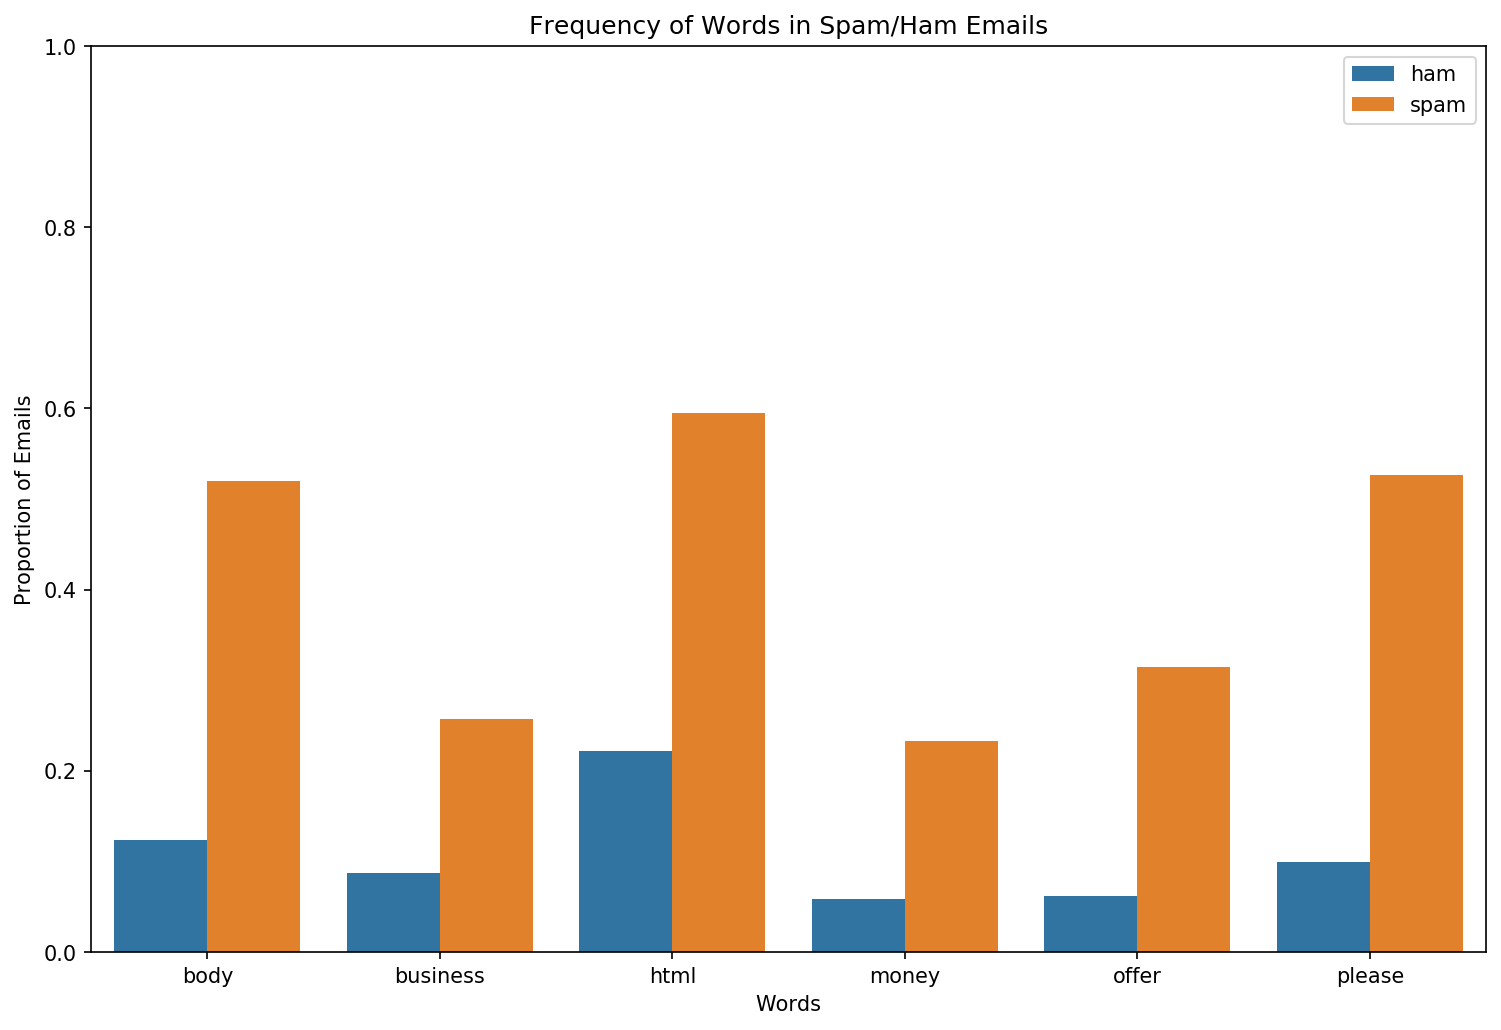

In [84]:
# YOUR CODE HERE
#raise NotImplementedError()
sns.barplot(x = encoded_table_melted_groups['variable'],
            y = encoded_table_melted_groups['value'],
            hue = encoded_table_melted_groups['label'])
plt.ylim([0, 1])
plt.xlabel('Words')
plt.ylabel('Proportion of Emails')
plt.legend(title = "")
plt.title("Frequency of Words in Spam/Ham Emails")

q3a_gca = plt.gca();

In [85]:
# TEST 

heights = [patch.get_height() for patch in q3a_gca.get_children() if isinstance(patch, matplotlib.patches.Rectangle)]

assert set(encoded_table_melted_groups["value"].values).issubset(set(heights))

When the feature takes two values, it makes sense to compare its proportions across classes (as in the previous question). Otherwise, if the feature can take on numeric values, we can compare the distributions of these values for different classes. 


### Question 3b

The length of emails might indicate spam or ham. Below we have a chart comparing the distribution of the length of spam emails to the distribution of the length of ham emails in the training set. 

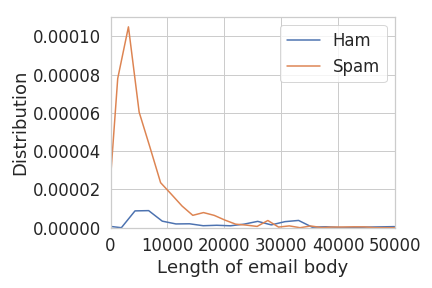

In [86]:
Image(f"{home_path}/shared/Project2/training_conditional_densities2.png")

Make a copy of the training set. Add a column to the copy called `length` that has the number of characters in the email.

In [87]:
training_set_copy = training_set.copy()
training_set_copy["length"] = training_set_copy["email"].str.len()
training_set_copy.head()
# YOUR CODE HERE
#raise NotImplementedError()

,id,subject,email,spam,length
0,7657,Subject: Patch to enable/disable log\n,"while i was playing with the past issues, it a...",0,1641
1,6911,Subject: When an engineer flaps his wings\n,url: http://diveintomark.org/archives/2002/10/...,0,4713
2,6074,Subject: Re: [Razor-users] razor plugins for m...,"no, please post a link!\n \n fox\n ----- origi...",0,1399
3,4376,Subject: NYTimes.com Article: Stop Those Press...,this article from nytimes.com \n has been sent...,0,4435
4,5766,Subject: What's facing FBI's new CIO? (Tech Up...,<html>\n <head>\n <title>tech update today</ti...,0,32857


In [88]:
# TEST 

assert 'length' in training_set_copy.columns



Now we can generate the chart.

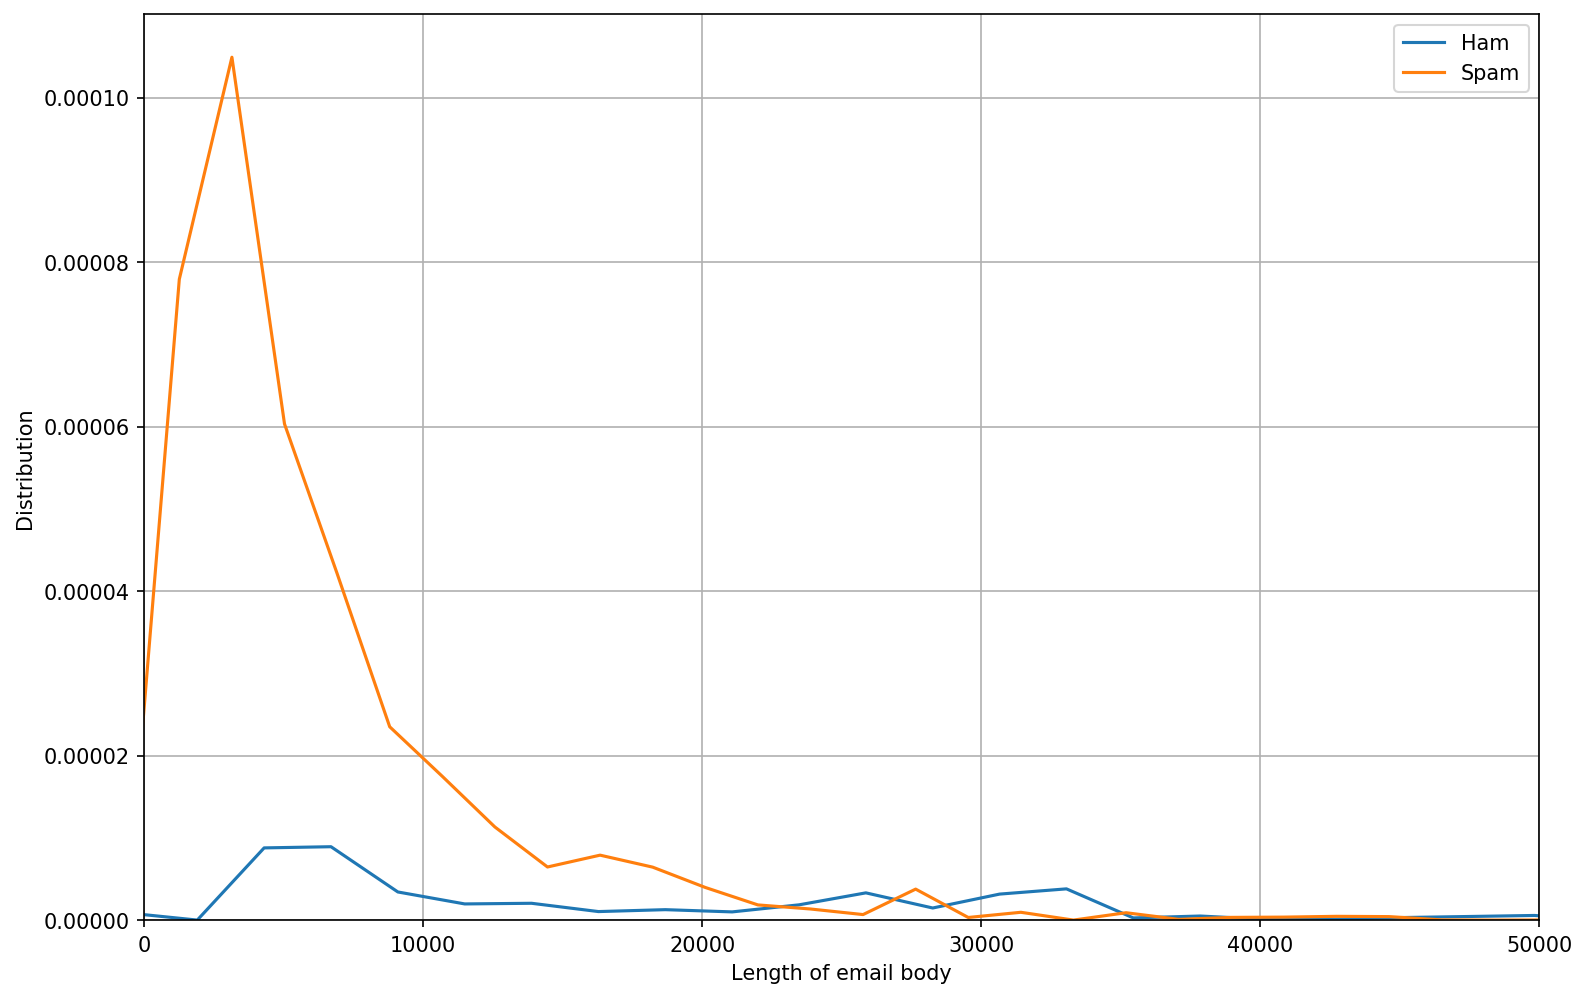

In [89]:
sns.distplot(training_set_copy.loc[training_set_copy['spam'] == 0, 'length'],hist=False, label='Ham')
sns.distplot(training_set_copy.loc[training_set_copy['spam'] == 1, 'length'],hist=False, label='Spam')
plt.xlabel('Length of email body')
plt.ylabel('Distribution')
plt.xlim((0,50000))
plt.grid();

## 4. Classification

Notice that the output of `words_in_texts(words, train['email'])` is a numeric matrix containing features for each email. This means we can use it directly to train a model.

### Question 4

We've given you 5 words that might be useful as features to distinguish spam/ham emails. Use these words as well as the `training_set` table to create two NumPy arrays: `X_train` and `Y_train`.

- `X_train` should be a 2-dimensional array of 0s and 1s created by using your `words_in_texts` function on all the emails in the training set.
- `Y_train` should be a 1-dimensional array of the correct labels for each email in the training set.

In [125]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words,training_set['email'])
Y_train = np.array(training_set['spam'])
print(X_train)
print(Y_train)
# YOUR CODE HERE
#raise NotImplementedError()

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[0 0 0 ... 0 0 0]


In [126]:
# TEST
assert X_train.shape == (7513, 5) # X matrix should have a certain size
assert np.all(np.unique(X_train) == np.array([0, 1])) # X matrix should consist of only 0 or 1


## Fitting the Model

### Question 5

We will use [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) in the scikit-learn package for logistic regression.

Here we will train a model with `X_train` and `Y_train`. Use the `fit` function to fit the model to the data. 

In [92]:
model = LogisticRegression()
model.fit(X_train, Y_train)
# YOUR CODE HERE
#raise NotImplementedError()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now we can compute the accuracy of the model on the training data set. You should get an accuracy around 0.75.

In [93]:
# TEST

training_accuracy = model.score(X_train, Y_train)
assert training_accuracy > 0.72


## 6. Evaluating Classifiers

While we have high accuracy, the model has some shortcomings. We are evaluating accuracy on the training set. The in-sample accuracy is misleading because we determined the model from the training set. We need to think about the out-of-sample accuracy.

Remember that our model would will be used for preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

- **Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

- **Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

- **False-positive rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below.

In [94]:
observed = Y_train
y_predict = 0

tp = sum((observed == y_predict) & (observed == 1))
tn = sum((observed == y_predict) & (observed == 0))
fp = sum((observed != y_predict) & (observed == 0))
fn = sum((observed != y_predict) & (observed == 1))

zero_predictor_fp = fp
zero_predictor_fn = fn
print(zero_predictor_fp)
print(zero_predictor_fn)
# YOUR CODE HERE
#raise NotImplementedError()

0
1918


In [95]:
# TEST
assert zero_predictor_fp >= 0
assert zero_predictor_fn >= 0


### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do NOT use any `sklearn` functions.

In [96]:
def accuracy(observed, predicted):
    return np.mean(observed == predicted)
def recall(observed, predicted):
    tp = sum((observed == predicted) & (observed == 1))
    fn = sum((observed != predicted) & (observed == 1))

    return tp / (tp + fn)

In [97]:
zero_predictor_acc = accuracy(Y_train,y_predict)
zero_predictor_recall = recall(Y_train,y_predict)
print(zero_predictor_acc)
print(zero_predictor_recall)
# YOUR CODE HERE
#raise NotImplementedError()

0.7447091707706642
0.0


In [98]:
# TEST
assert zero_predictor_acc >= 0
assert zero_predictor_recall >= 0


We learn from Question 6a and Question 6b that for `zero_predictor`:

- There are no false positives ($\text{FP} = 0$) because nothing is labeled spam. 
- Every spam email is mislabeled as ham, so the number of false negatives is equal to the number of spam emails in the training data ($\text{FN} = 1918$).
- The classifier correctly labels nearly 75% of observations in the training data.
- The classifier recalls none (0%) of the spam observations.


### Question 6c

Consider the the `LogisticRegression` model from Question 5. Without using any `sklearn` functions, compute the precision, recall, and false-alarm rate of on the training set.


In [99]:
Y_train_hat = model.predict(X_train)

TP = sum((observed == Y_train_hat) & (observed == 1))
TN = sum((observed == Y_train_hat) & (observed == 0))
FP = sum((observed != Y_train_hat) & (observed == 0))
FN = sum((observed != Y_train_hat) & (observed == 1))

# YOUR CODE HERE
#raise NotImplementedError()

logistic_predictor_precision = TP / (TP + FP) 
logistic_predictor_recall = TP / (TP + FN) 
logistic_predictor_fpr = FP / (FP + TN) 

In [100]:
# TEST
assert logistic_predictor_precision >= 0
assert logistic_predictor_recall >= 0
assert logistic_predictor_fpr >= 0


### Question 6d

Without using any `sklearn` functions, compute the precision, recall, and false-alarm rate of on the validation set.

In [101]:
X_val = words_in_texts(some_words, validation_set['email']) 
Y_val = np.array(validation_set['spam']) 
Y_val_hat = model.predict(X_val)

TP = sum((Y_val == Y_val_hat) & (Y_val == 1))
TN = sum((Y_val == Y_val_hat) & (Y_val == 0))
FP = sum((Y_val != Y_val_hat) & (Y_val == 0))
FN = sum((Y_val != Y_val_hat) & (Y_val == 1))

# YOUR CODE HERE
#raise NotImplementedError()


logistic_predictor_precision_validation = TP / (TP + FP) 
logistic_predictor_recall_validation = TP / (TP + FN) 
logistic_predictor_fpr_validation = FP / (FP + TN) 

In [102]:
# TEST
assert logistic_predictor_precision_validation >= 0
assert logistic_predictor_recall_validation >= 0
assert logistic_predictor_fpr_validation >= 0


### Question 6e

We can visualize these numbers on the validation set with a confusion matrix.

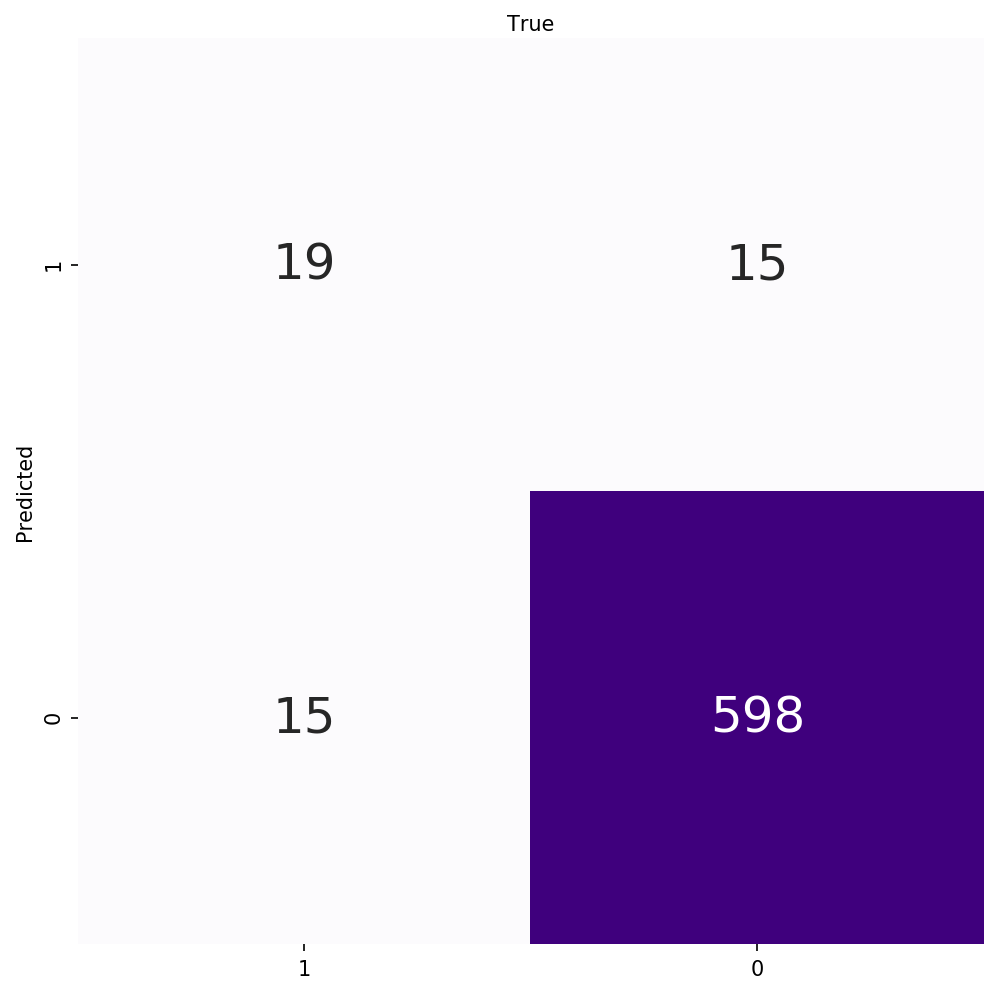

In [103]:
def plot_confusion(confusion):
    sns.heatmap(confusion, annot=True, fmt='d',
                cmap="Purples", annot_kws={'fontsize': 24}, square=True,
                xticklabels=[1, 0], yticklabels=[1, 0], cbar=False)
    plt.gca().xaxis.set_label_position('top')
    plt.xlabel('True')
    plt.ylabel('Predicted')

confusion = np.array([
    [TP, FP],
    [FP, TN],
])
    
plot_confusion(confusion)

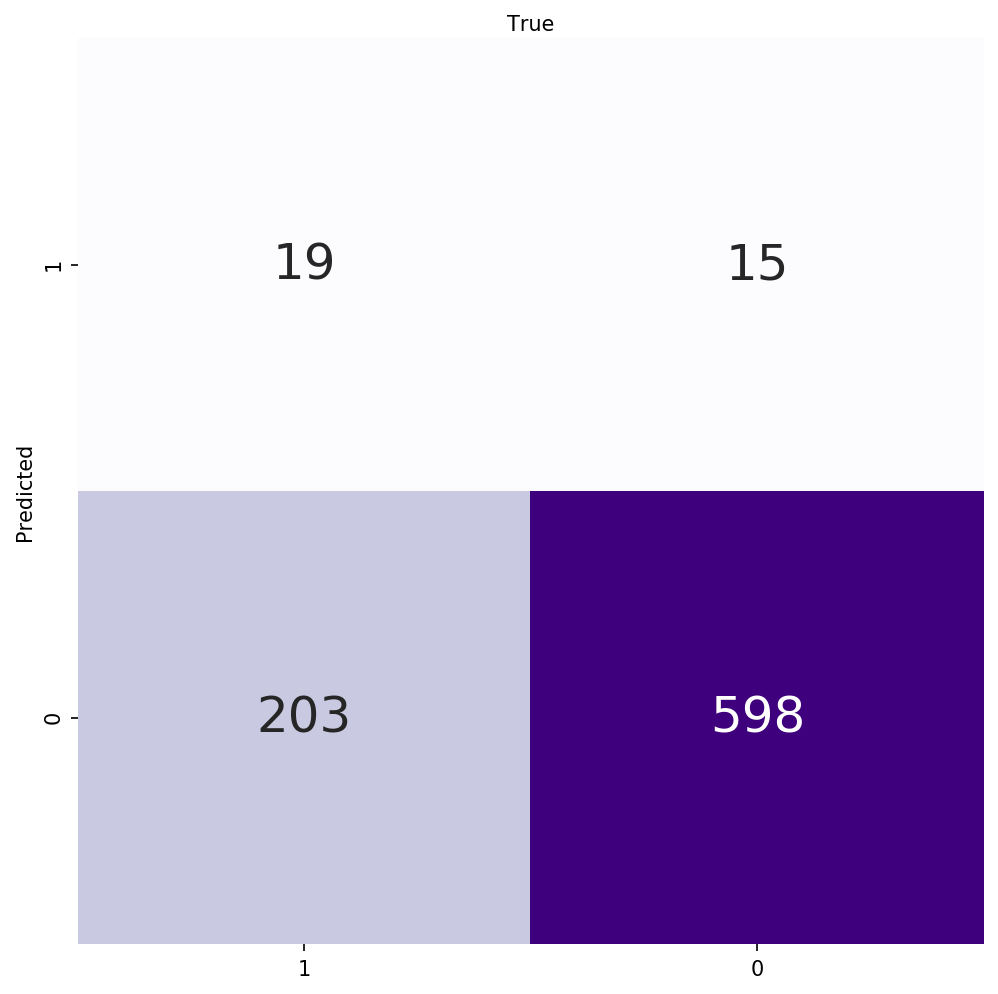

In [104]:
def plot_confusion(confusion):
    sns.heatmap(confusion, annot=True, fmt='d',
                cmap="Purples", annot_kws={'fontsize': 24}, square=True,
                xticklabels=[1, 0], yticklabels=[1, 0], cbar=False)
    plt.gca().xaxis.set_label_position('top')
    plt.xlabel('True')
    plt.ylabel('Predicted')

confusion = np.array([
    [TP, FP],
    [FN, TN],
])
    
plot_confusion(confusion)

**True or False**: There are equal number of False Positives and False Negatives when using the logistic regression classifier from Question 5?


In [105]:
q6e = False 

# YOUR CODE HERE
#raise NotImplementedError()

In [106]:
# TEST 

assert q6e in [True, False]


We can make a few observations about the accuracy of the model.

1. Our logistic regression classifier got 75.6% prediction accuracy. Remember accuracy is number of correct predictions / total. How does this compare with predicting 0 for every email?
 * An accuracy of 75% means that we're only doing slightly better than guessing ham for every email.
1. What is a problem with the features in the model?
 *  The encoded features in `X_train` have many rows with all 0. That is, the words we've chosen as our features aren't actually present in many of the emails so the classifier can't use them to distinguish between ham/spam emails.
1. Which of these two classifiers would you prefer for a spam filter and why?
 * The false-alarm rate for logistic regression is too high, even at 2%: ideally false-alarms would almost never happen. I might rather wade through thousands of spam emails than get 2% of legitimate emails filtered out of my inbox."""


### Question 7: ROC Curve 

We can balance precision and recall. Usually we cannot get both precision equal to 1 (i.e. no false positives) and recall equal to 1 (i.e. no false negatives). 

Remember that logistic regression calculates the probability that an example belongs to a particular category. 

In [107]:
Y_val_hat_prob = model.predict_proba(X_val)[:, 1]

Here we use the `predict_proba` function to predict a probability. 

From a probability, we can determine a category by comparison with a threshold. With a threshold of 0.5, we label an email as spam for a predicted probability $\geq 0.5$. However, we could take the threshold to be $0.25$ or $0.75$. Adjusting the threshold allows us balance false positives and false negatives.

The [Receiver Operating Characteristic](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) metric compares true positives and false positives for each possible cutoff probability. In the cell below, we plot the value on the validation set.


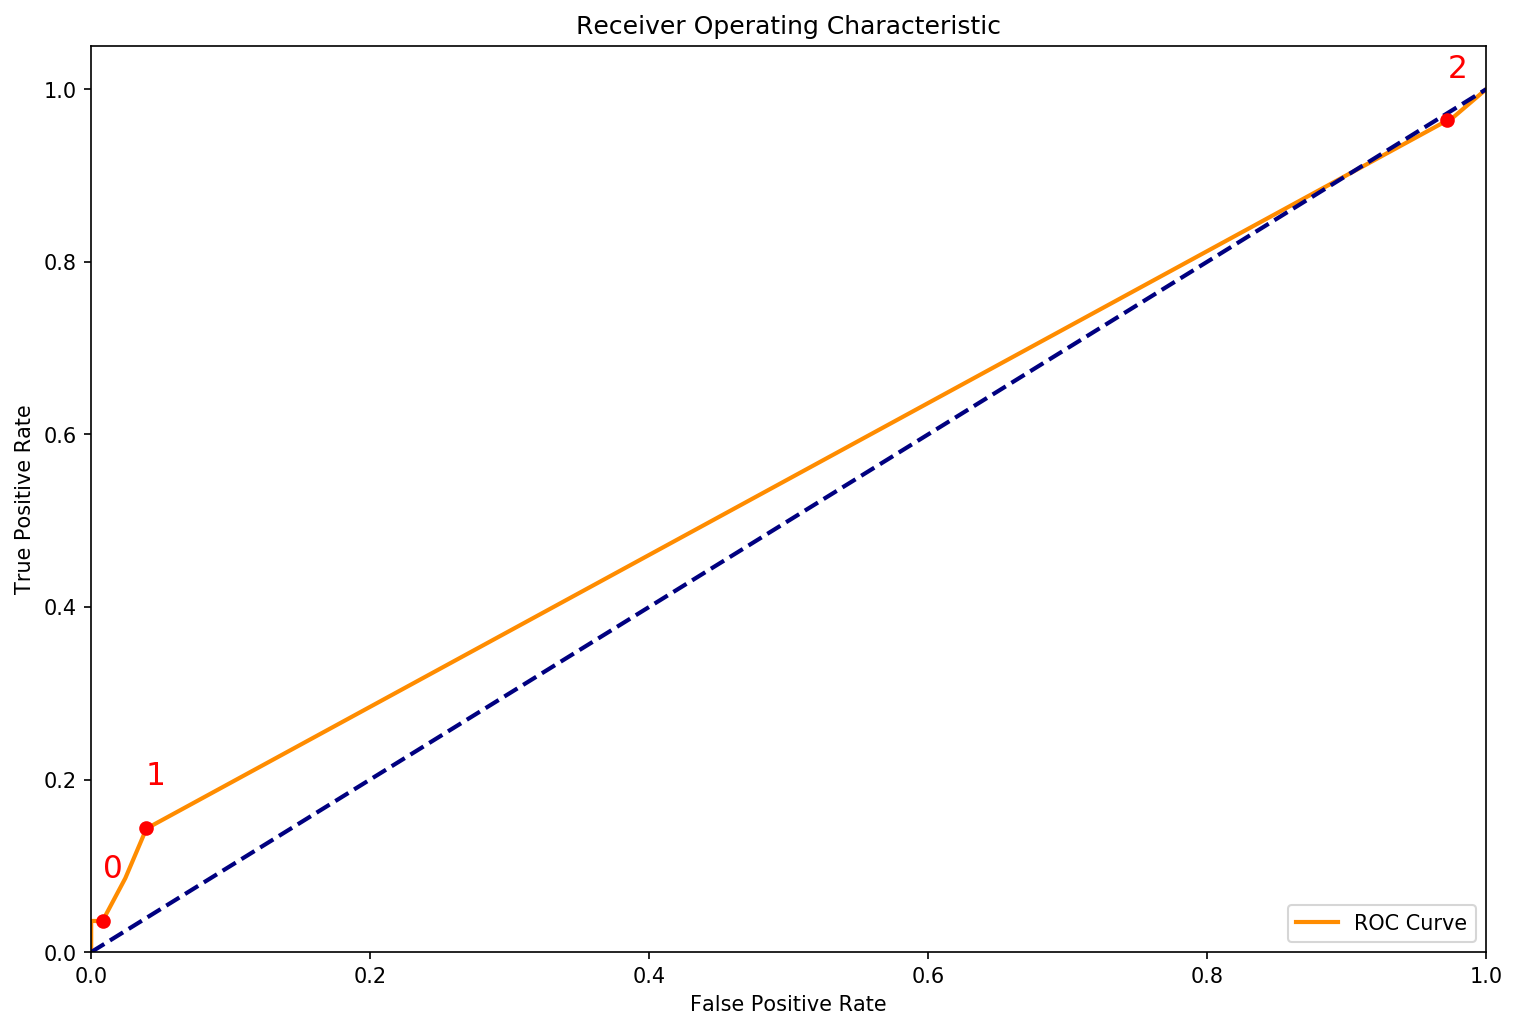

In [108]:
fpr, tpr, threshold = roc_curve(Y_val, Y_val_hat_prob)

threshold_values = [5,8,10]

for idx, x,y in zip([0,1,2], fpr[threshold_values],tpr[threshold_values]):
    plt.plot(x,y, "ro", zorder = 10)
    plt.text(x, y + 0.05, str(idx), fontdict={"color":"red", "size":15})

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right");

We have labeled three points. These points correspond to thresholds in the set 0.2, 0.3, and 0.6. Assign the thresholds to the points.

In [127]:
q7 = [.2,.3,.6]

# YOUR CODE HERE
#raise NotImplementedError()

In [128]:
# TEST 

assert type(q7) == list
assert set(q7).issubset({0.6, 0.3, 0.2})


### Question 8: Cross Validation

Take the following function for computing the accuracy of classifications.


In [111]:
def accuracy(y_pred, y_actual):
    return np.mean(y_pred == y_actual)

We want to perform cross validation to compare different choices of words for the classfication. By training and validating multiple times, we can gauge the accuracy and consistency of the classfications.

In [112]:
def compute_CV_accs(model, X_train, Y_train, vocabulary, number_splits):
    kf = KFold(n_splits=number_splits, shuffle=True, random_state=42)
    
    vocabulary_accs = dict()
    for words in vocabulary:
        X_train_features = words_in_texts(words, X_train) 

        validation_accs = []        
        for train_idx, valid_idx in kf.split(X_train):
            # split the data
            split_X_train, split_X_valid = X_train_features[train_idx], X_train_features[valid_idx]
            split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

            # Fit the model on the training split
            model.fit(split_X_train,split_Y_train)

            # Compute the accuracy on the validation split
            acc = accuracy(model.predict(split_X_valid), split_Y_valid)

            validation_accs.append(acc)
    
        #average validation accuracies
        print("For vocabulary {0}".format(",".join(words)), "\n Mean: {0}".format(np.mean(validation_accs)), "\n Standard Deviation {0}\n\n".format(np.std(validation_accs)))
        
        vocabulary_accs[tuple(words)] = {'mean': np.mean(validation_accs), 'std': np.std(validation_accs)}
        
    return vocabulary_accs

### Question 8a
Consider the collection of words `vocabulary1` and `vocabulary2`

In [113]:
vocabulary1 = ['drug', 'bank', 'prescription', 'memo', 'private']
vocabulary2 = ['please', 'money', 'offer', 'receive', 'contact', 'free']

We want to perform 5-fold cross validation with `compute_CV_accs`. Run the function on `original_training_data` with `LogisticRegression` model for `vocabulary1` and `vocabulary2`. Call the output `vocabulary_accs`.

In [131]:
model = LogisticRegression()
X_train = original_training_data['email']
Y_train =  original_training_data['spam']
vocabulary = [vocabulary1, vocabulary2]
number_splits = 5


vocabulary_accs = compute_CV_accs(model,X_train, Y_train, vocabulary, number_splits)

# YOUR CODE HERE
#raise NotImplementedError()

For vocabulary drug,bank,prescription,memo,private 
 Mean: 0.7557479648252925 
 Standard Deviation 0.012498431306465675


For vocabulary please,money,offer,receive,contact,free 
 Mean: 0.8100138129971335 
 Standard Deviation 0.007632030517628998




In [115]:
# TEST 
assert np.isclose(vocabulary_accs[tuple(vocabulary1)]['mean'], 0.7557479648252925)
assert np.isclose(vocabulary_accs[tuple(vocabulary1)]['std'], 0.012498431306465675)


### Question 8b

Which collection of words is more accurate?

In [116]:
q8b_1 = "vocabulary2"

# YOUR CODE HERE
#raise NotImplementedError()

In [117]:
# TEST 

assert q8b_1 in ["vocabulary1", "vocabulary2"]


Which collection of words is more consistent? 

In [118]:
q8b_2 = "vocabulary2"

# YOUR CODE HERE
#raise NotImplementedError()

In [119]:
# TEST 

assert q8b_2 in ["vocabulary1", "vocabulary2"]


Which should you choose for determining the features of your model?

In [120]:
q8b_3 = "vocabulary2"

# YOUR CODE HERE
#raise NotImplementedError()

In [121]:
# TEST 

assert q8b_3 in ["vocabulary1", "vocabulary2"]


### Question 9 (Optional)

Google has a platform called Kaggle for hosting modeling competitions. We have configured a competition with the testing data. 

In [122]:
testing_set = pd.read_csv(testing_set_path)
testing_set['email'] = testing_set['email'].str.lower()
testing_set

,id,subject,email
0,0,Subject: CERT Advisory CA-2002-21 Vulnerabilit...,\r\n \r\n -----begin pgp signed message-----\r...
1,1,Subject: ADV: Affordable Life Insurance ddbfk\r\n,low-cost term-life insurance!\r\n save up to 7...
2,2,Subject: CAREER OPPORTUNITY. WORK FROM HOME\r\n,------=_nextpart_000_00a0_03e30a1a.b1804b54\r\...
3,3,Subject: Marriage makes both sexes happy\r\n,"url: http://www.newsisfree.com/click/-3,848315..."
4,4,Subject: Re: [SAtalk] SA very slow (hangs?) on...,on thursday 29 august 2002 16:39 cet mike burg...
...,...,...,...
995,995,Subject: Re: Alsa/Redhat 8 compatability\r\n,"once upon a time, brian wrote :\r\n \r\n > \r\..."
996,996,Subject: Re: Goodbye Global Warming\r\n,\r\n --]> a green once said that if the spotte...
997,997,Subject: Re: Entrepreneurs\r\n,"on fri, 23 aug 2002, robert harley wrote:\r\n ..."
998,998,Subject: Re: [ILUG] slashdot EW Dijkstra humor...,jpl suggested:\r\n > recursion is only truely...


For example, if we want to submit the model from Question 8 with `vocabulary2` then we would make output the predictions to a csv file.

In [123]:
vocabulary2 = ['please', 'money', 'offer', 'receive', 'contact', 'free']

X_train = words_in_texts(vocabulary2, original_training_data['email'])
Y_train = original_training_data['spam']


model = LogisticRegression()
model.fit(X_train, Y_train)

X_test = words_in_texts(vocabulary2, testing_set['email'])
Y_test_hat = model.predict(X_test)

testing_set_predictions = pd.DataFrame(data = Y_test_hat, columns = ["Category"])
testing_set_predictions

,Category
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


Now we can output to a csv file for submission to the [Kaggle website](https://www.kaggle.com/c/dsua-112-project2)

In [124]:
testing_set_predictions.to_csv("Kaggle_submission.csv", index = True, index_label="Id")

Can you make the spam filter more accurate? Try to get at least **88%** accuracy on the test set. Call your predictions `Y_test_hat`. This should be a numpy array consisting of 0 and 1 for each every email in the `testing_set` table. 


Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.